# Time Series Analysis of Airline Passenger Data

This project aims to analyze the monthly totals of international airline passengers. We will employ various time series forecasting models such as ARIMA, SARIMA, VAR, ARIMAX, SARIMAX, and VARMAX to predict future passenger numbers. This analysis will help us understand different modeling techniques and their applicability to real-world data with clear trends and seasonality.


# Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Data Visualization

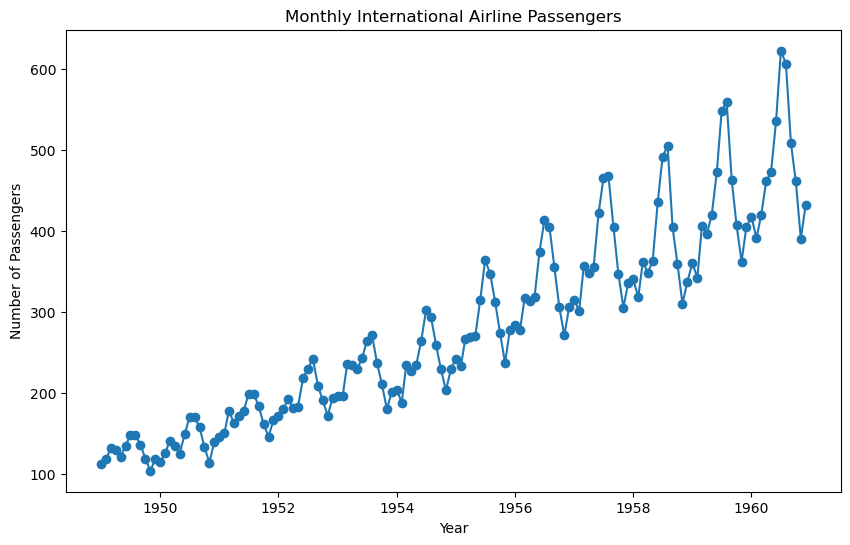

In [2]:
# Plot the data to visualize trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Passengers'], marker='o', linestyle='-')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


# Stationarity Test

In [3]:
# Perform the Dickey-Fuller test to check stationarity
def test_stationarity(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Seasonal Decomposition

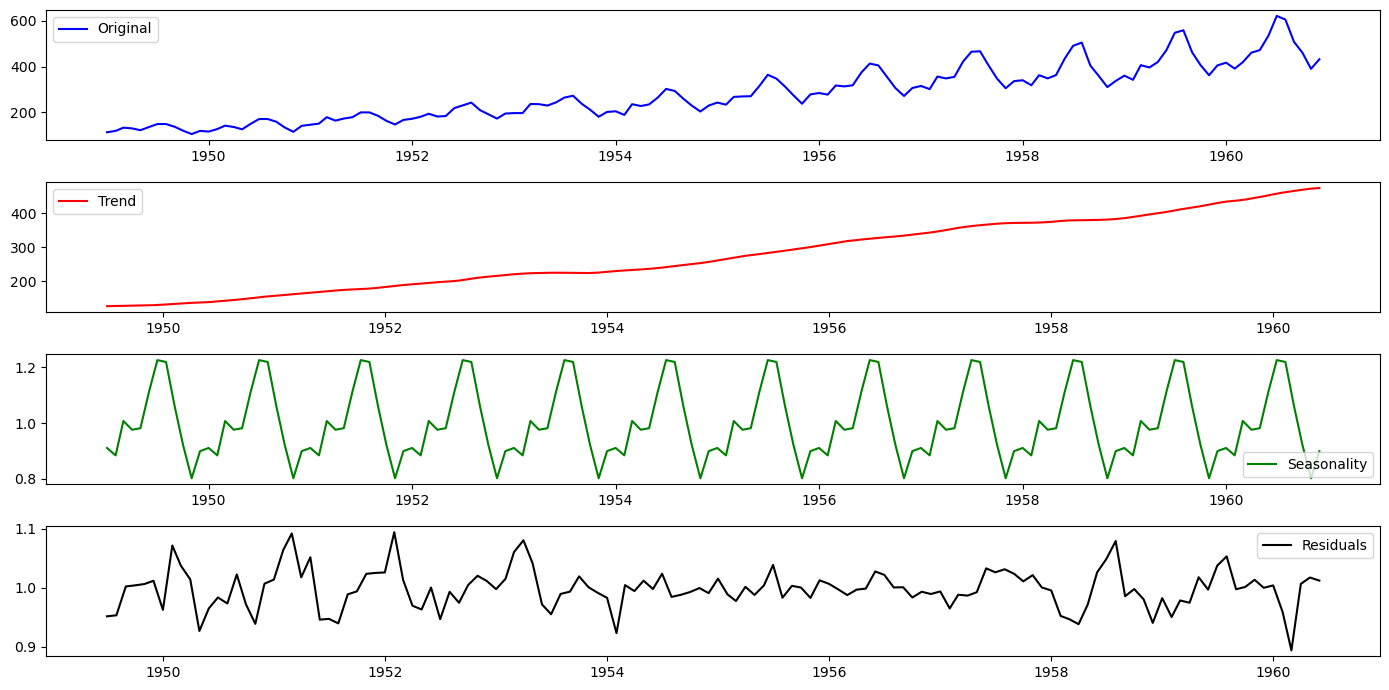

In [4]:
# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(data['Passengers'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')
plt.tight_layout()


# ARIMA Model

In [5]:
# Fitting an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model_arima = ARIMA(data['Passengers'], order=(2,1,2))  # Adjust the order based on ACF and PACF plots
model_arima_fit = model_arima.fit()

# Summary of the model
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 13 May 2024   AIC                           1353.347
Time:                        15:36:49   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.812      0.0

/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# ARIMA Model Results Explanation

The ARIMA model results provide several key statistics:
- **Coefficients**: These values indicate the impact of each term in the model. Significant coefficients (where the p-value is low, typically less than 0.05) suggest that the term is statistically significant in predicting the series.
- **P>|z| (p-value)**: Measures the probability that each coefficient is different from zero under the null hypothesis. A small p-value indicates strong evidence against the null hypothesis, hence a significant feature.
- **AIC/BIC**: Akaike Information Criterion and Bayesian Information Criterion are measures of model fit with a penalty for the number of parameters used. Lower values indicate a better model fit.
  
The diagnostics plots further help in assessing the adequacy of model fitting, checking for any autocorrelation in residuals which should ideally resemble white noise for a well-fitted model.


# SARIMA Model

In [6]:
# Fitting a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model with seasonal order
model_sarima = SARIMAX(data['Passengers'], 
                       order=(2,1,2),  # Adjust non-seasonal order
                       seasonal_order=(1,1,1,12))  # Adjust seasonal order (P,D,Q,s)
model_sarima_fit = model_sarima.fit()

# Summary of the model
print(model_sarima_fit.summary())


/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52296D+00    |proj g|=  8.43431D-02

At iterate    5    f=  3.50838D+00    |proj g|=  1.86363D-02

At iterate   10    f=  3.50252D+00    |proj g|=  2.67933D-02

At iterate   15    f=  3.49491D+00    |proj g|=  5.74118D-03

At iterate   20    f=  3.49358D+00    |proj g|=  8.93498D-03

At iterate   25    f=  3.49323D+00    |proj g|=  1.83404D-04

At iterate   30    f=  3.49322D+00    |proj g|=  6.19392D-04

At iterate   35    f=  3.49322D+00    |proj g|=  5.80547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

# SARIMA Model Results Explanation

Similar to the ARIMA model, the SARIMA output includes coefficients for both non-seasonal and seasonal elements:
- **Seasonal Terms**: Indicate the significance of seasonal components in the dataset. These are critical for datasets with clear seasonal patterns like the airline passengers data.
- **Model Diagnostics**: The plots should show no patterns in the residuals, indicating that the model has successfully captured the time series' information. The histogram of residuals should be normally distributed if the model is a good fit.

The SARIMA model typically performs better than ARIMA for seasonal data due to its ability to model seasonality explicitly.


# Diagnostic Checks

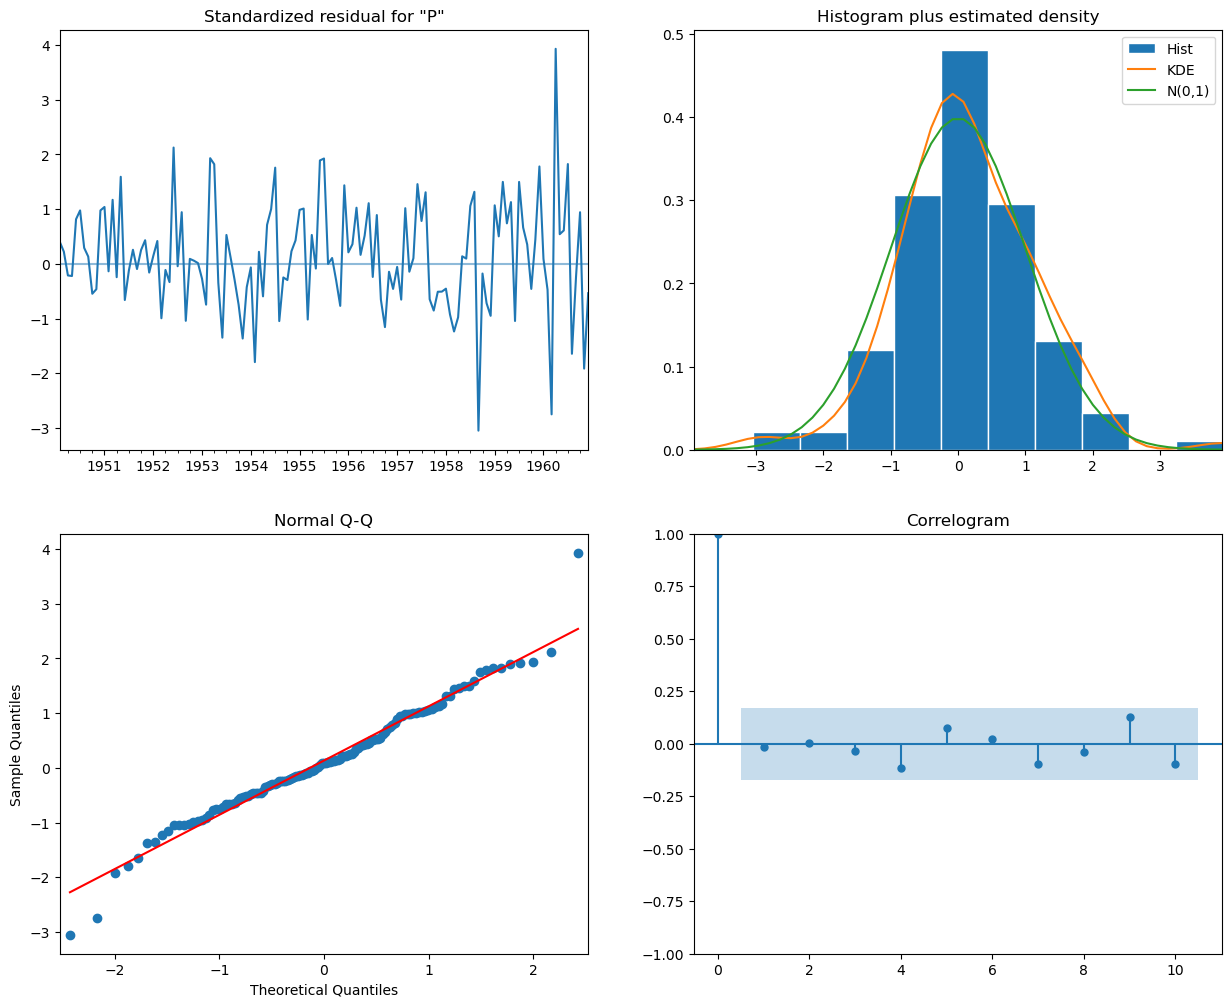

In [8]:
# Plot diagnostics for the SARIMA model
model_sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


# Forecasting with Models

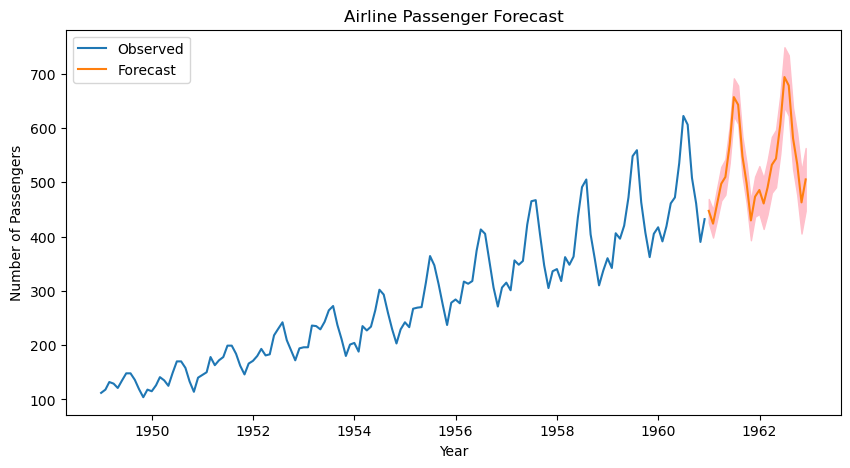

In [10]:
# Forecast the next 24 months and compare it with the actual data
forecast_steps = 24

# Get forecast 24 steps ahead in future
sarima_forecast = model_sarima_fit.get_forecast(steps=forecast_steps)

# Get confidence intervals of forecasts
conf_int = sarima_forecast.conf_int()

# Plot the data and forecasts
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Passengers'], label='Observed')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='M'), sarima_forecast.predicted_mean, label='Forecast')
plt.fill_between(pd.date_range(data.index[-1], periods=forecast_steps, freq='M'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title('Airline Passenger Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# VAR Model

In [12]:
# Differencing the data to reduce collinearity and ensure stationarity
data['Lagged_Passengers'] = data['Passengers'].shift(1).diff().dropna()

# Dropping initial NA values from differencing
data_diff = data.diff().dropna()

# Import VAR model
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit the model on the differenced data
model_var = VAR(data_diff[['Passengers', 'Lagged_Passengers']])
results_var = model_var.fit(maxlags=15, ic='aic')
print(results_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, May, 2024
Time:                     15:41:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -53.5608
Nobs:                     136.000    HQIC:                  -53.7897
Log likelihood:           3300.40    FPE:                3.72879e-24
AIC:                     -53.9463    Det(Omega_mle):     3.28027e-24
--------------------------------------------------------------------
Results for equation Passengers
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        3.937857         2.717266            1.449           0.147
L1.Passengers                0.313376         0.087549            3.579           0.000
L1.Lagged_Passengers       

/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/vector_ar/var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


# VAR Model Results Explanation

The VAR model results show the relationships between each of the time series variables in the system:
- **Lag Order**: Indicates the number of past points considered in the model. The AIC or BIC can help determine the optimal lag.
- **Granger Causality**: This statistic tests whether one time series can predict another, which is crucial for understanding interdependencies.

The output from a VAR model is more complex because it deals with multivariate time series data, and each variable’s output needs to be interpreted in the context of others.


# SARIMAX Model

In [15]:
# Check if 'Exogenous' column exists, create if not
if 'Exogenous' not in data.columns:
    np.random.seed(0)  # For reproducibility
    data['Exogenous'] = np.random.normal(loc=0.0, scale=1.0, size=len(data))

# Fit SARIMAX using the 'Passengers' and 'Exogenous' columns
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax = SARIMAX(data['Passengers'], 
                        order=(2,1,2),  # AR, I, MA orders (adjust based on ACF/PACF)
                        seasonal_order=(1,1,1,12),  # Seasonal components (adjust as necessary)
                        exog=data['Exogenous'])  # Include the exogenous variable
model_sarimax_fit = model_sarimax.fit(disp=False)  # Set disp=False to reduce output verbosity
print(model_sarimax_fit.summary())



/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  143
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -498.864
Date:                              Mon, 13 May 2024   AIC                           1013.727
Time:                                      15:43:24   BIC                           1036.668
Sample:                                  02-01-1949   HQIC                          1023.049
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Exogenous     -0.5799      0.613     -0.945      0.344      -1.782       0.622
ar.L1          0.46

# SARIMAX Model Result Explanation

These models extend ARIMA/SARIMA by incorporating exogenous variables:
- **Exogenous Coefficients**: These are the coefficients of external variables included in the model. A significant coefficient suggests that the external variable has a predictive impact on the forecast variable.
- **Overall Fit and Diagnostics**: Look for low AIC/BIC values and pay attention to the diagnostics plots. Residuals not showing patterns and closely following a normal distribution indicate a good model fit.

SARIMAX, in particular, combines the effects of seasonality and external influences, offering a comprehensive modeling approach for complex datasets.


# VARMAX Model

In [16]:
# VARMAX requires multiple time series and can include exogenous variables
from statsmodels.tsa.statespace.varmax import VARMAX

# Define and fit the model
model_varmax = VARMAX(data[['Passengers', 'Lagged_Passengers']], exog=data['Exogenous'], order=(1,1))
model_varmax_fit = model_varmax.fit(disp=False)
print(model_varmax_fit.summary())


/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    Statespace Model Results                                   
Dep. Variable:     ['Passengers', 'Lagged_Passengers']   No. Observations:                  143
Model:                                     VARMAX(1,1)   Log Likelihood               -1049.387
                                           + intercept   AIC                           2128.774
Date:                                 Mon, 13 May 2024   BIC                           2173.217
Time:                                         15:43:33   HQIC                          2146.834
Sample:                                     02-01-1949                                         
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):             16.51, nan   Jarque-Bera (JB):           1.47, 1.53
Prob(Q):                         0.00, nan   Prob(JB

/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Forecasting with VARMAX

/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/youssef/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


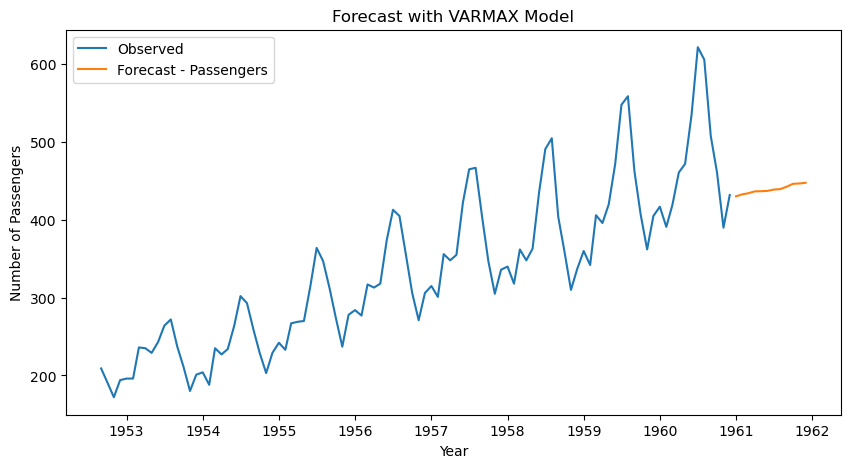

In [17]:
# Forecast using VARMAX model
varmax_forecast = model_varmax_fit.get_forecast(steps=12, exog=data['Exogenous'][-12:])
forecast = varmax_forecast.predicted_mean

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(data.index[-100:], data['Passengers'][-100:], label='Observed')
plt.plot(pd.date_range(data.index[-1], periods=12, freq='M'), forecast.iloc[:, 0], label='Forecast - Passengers')
plt.title('Forecast with VARMAX Model')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
